In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:01<00:00, 130MB/s]
100% 163M/163M [00:01<00:00, 121MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1520.jpg', 'with_mask_1473.jpg', 'with_mask_2764.jpg', 'with_mask_2873.jpg', 'with_mask_2412.jpg']
['with_mask_3333.jpg', 'with_mask_2215.jpg', 'with_mask_2446.jpg', 'with_mask_810.jpg', 'with_mask_266.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_894.jpg', 'without_mask_2086.jpg', 'without_mask_3724.jpg', 'without_mask_1718.jpg', 'without_mask_1630.jpg']
['without_mask_3579.jpg', 'without_mask_3004.jpg', 'without_mask_2509.jpg', 'without_mask_3055.jpg', 'without_mask_2507.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for two class of images
with mask-->1
withhout mask-->0

In [10]:
#create the labels

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])
print(len( labels ))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


Displaying the images using matplotlib, this can also be done using cv2

In [23]:
type(labels)

list

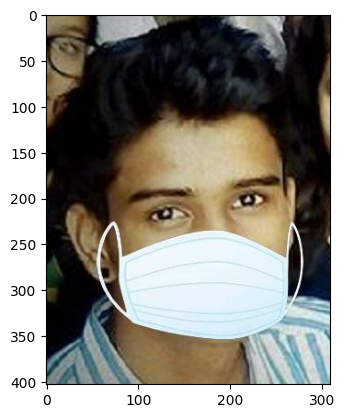

In [15]:
#displaying the with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_1000.jpg') # reads the image in form of a numpy array
imgplot = plt.imshow(img)
plt.show()

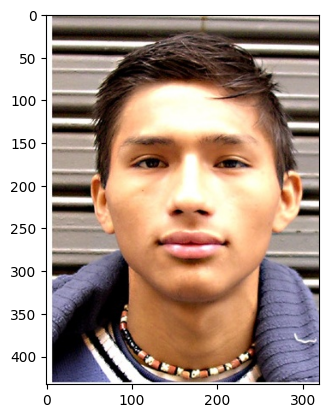

In [16]:
#displaying the without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_894.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing:
resize the images,
converting the images to numpy arrarys

In [17]:
#convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[125, 141, 154],
        [126, 142, 155],
        [132, 146, 161],
        ...,
        [230, 230, 231],
        [238, 238, 238],
        [253, 253, 251]],

       [[127, 143, 156],
        [129, 145, 158],
        [134, 148, 163],
        ...,
        [246, 246, 247],
        [244, 244, 244],
        [248, 248, 246]],

       [[128, 143, 157],
        [130, 146, 159],
        [134, 147, 163],
        ...,
        [254, 255, 255],
        [254, 254, 254],
        [254, 254, 253]],

       ...,

       [[ 34,  49,  84],
        [ 32,  47,  82],
        [ 30,  46,  81],
        ...,
        [ 38, 139, 171],
        [ 35, 140, 175],
        [ 38, 144, 180]],

       [[ 28,  43,  81],
        [ 28,  44,  81],
        [ 29,  45,  82],
        ...,
        [ 38, 142, 174],
        [ 38, 144, 176],
        [ 39, 144, 177]],

       [[ 37,  52,  92],
        [ 32,  47,  87],
        [ 30,  45,  85],
        ...,
        [ 40, 144, 177],
        [ 41, 147, 178],
        [ 41, 147, 180]]], dtype=uint8)
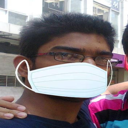

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [24]:
#converting the image list and labels list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [26]:
type(x)

numpy.ndarray

In [27]:
print(x.shape)

(7553, 128, 128, 3)


In [28]:
print(y.shape)

(7553,)


In [29]:
print(y)

[1 1 1 ... 0 0 0]


Train-TEst split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
#sclaing the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [33]:
x_train_scaled[0]

array([[[0.75294118, 0.75686275, 0.76470588],
        [0.75686275, 0.76078431, 0.76862745],
        [0.76078431, 0.76470588, 0.77254902],
        ...,
        [0.75686275, 0.76078431, 0.76862745],
        [0.76078431, 0.76470588, 0.77254902],
        [0.76470588, 0.76862745, 0.77647059]],

       [[0.75294118, 0.75686275, 0.76470588],
        [0.75686275, 0.76078431, 0.76862745],
        [0.76078431, 0.76470588, 0.77254902],
        ...,
        [0.75686275, 0.76078431, 0.76862745],
        [0.76078431, 0.76470588, 0.77254902],
        [0.76470588, 0.76862745, 0.77647059]],

       [[0.75294118, 0.75686275, 0.76470588],
        [0.75686275, 0.76078431, 0.76862745],
        [0.76078431, 0.76470588, 0.77254902],
        ...,
        [0.75686275, 0.76078431, 0.76862745],
        [0.76078431, 0.76470588, 0.77254902],
        [0.76470588, 0.76862745, 0.77647059]],

       ...,

       [[0.68627451, 0.69019608, 0.69803922],
        [0.69019608, 0.69411765, 0.70196078],
        [0.69411765, 0

**Building a cnn**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))  #128 is the number of the neurons in the hidden layer, these are some standard values like 128,256,64,32
model.add(keras.layers.Dropout(0.5))  # to deal with overfitting.
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #softmax activation is used when we have more than 2 classes to predict

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#compile the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [38]:
#training the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5) #lesser number of epochs to that there is less chance of model getting overfitted

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - acc: 0.6905 - loss: 0.6118 - val_acc: 0.8876 - val_loss: 0.2804
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - acc: 0.8815 - loss: 0.2886 - val_acc: 0.8843 - val_loss: 0.2884
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9002 - loss: 0.2419 - val_acc: 0.8876 - val_loss: 0.2590
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9188 - loss: 0.2001 - val_acc: 0.9207 - val_loss: 0.2300
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9408 - loss: 0.1487 - val_acc: 0.9190 - val_loss: 0.2258


Model evaluation

In [39]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9043 - loss: 0.2303
Test Accuracy = 0.9172733426094055


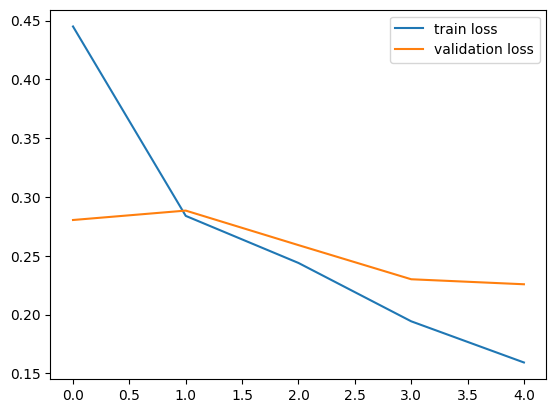

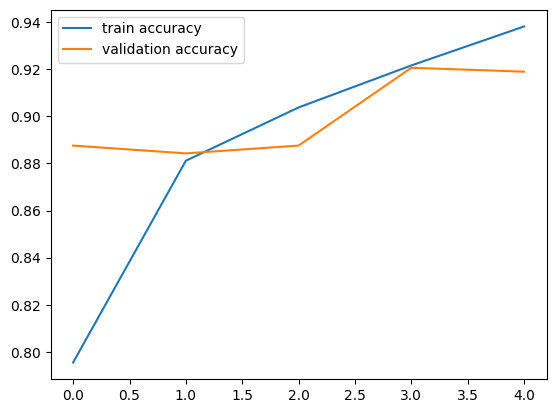

In [40]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive system**

Path of the image to be predicted: /content/2024-12-11.png


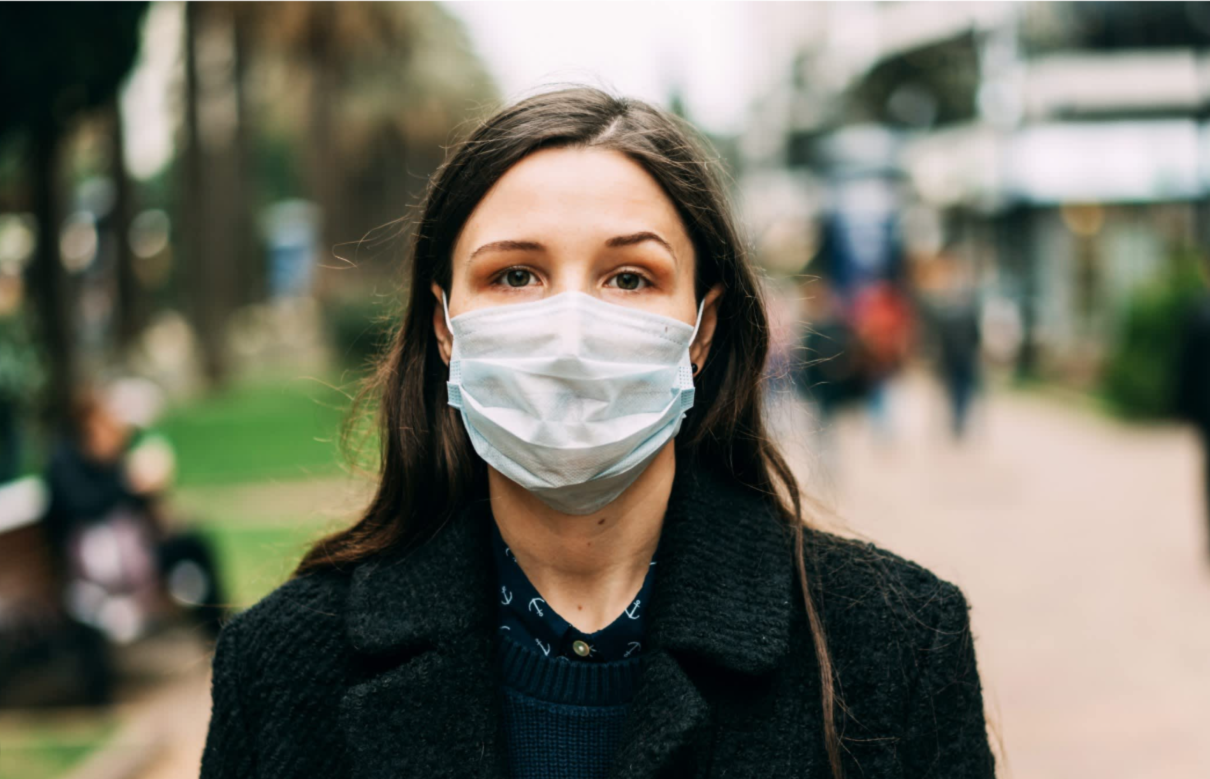

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
[[0.2858034 0.756579 ]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3]) #we are doing ths to tell our model that we are predicting for only one image.

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')